In [1]:
# -----------------------------
# Titanic Dataset - Data Cleaning & EDA
# -----------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style="whitegrid")

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%202/train.csv"
titanic = pd.read_csv(url)

In [4]:
# -----------------------------
# 1. Initial Exploration
# -----------------------------
print("Shape of dataset:", titanic.shape)
print("\nFirst 5 rows:\n", titanic.head())
print("\nDataset Info:\n")
print(titanic.info())
print("\nSummary Statistics:\n", titanic.describe(include="all"))

Shape of dataset: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0   

In [5]:
# -----------------------------
# 2. Data Cleaning
# -----------------------------

# Check missing values
print("\nMissing Values:\n", titanic.isnull().sum())

# Fill missing Age with median
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most frequent)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
titanic.drop(columns=["Cabin"], inplace=True)

# Drop PassengerId (not useful for analysis)
titanic.drop(columns=["PassengerId"], inplace=True)

print("\nAfter Cleaning Missing Values:\n", titanic.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After Cleaning Missing Values:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


/tmp/ipython-input-2811710867.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
/tmp/ipython-input-2811710867.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

/tmp/ipython-input-945432252.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic, palette="Set2")


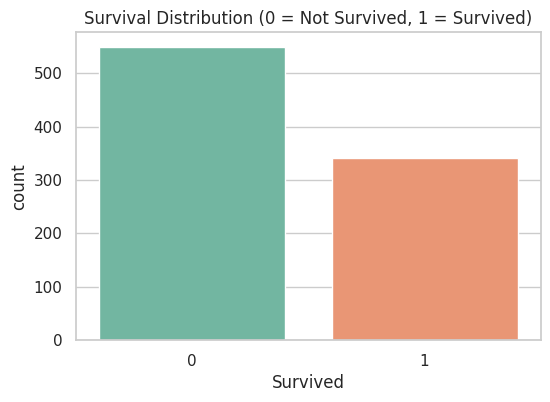

In [6]:
# -----------------------------
# 3. Exploratory Data Analysis
# -----------------------------

# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=titanic, palette="Set2")
plt.title("Survival Distribution (0 = Not Survived, 1 = Survived)")
plt.show()


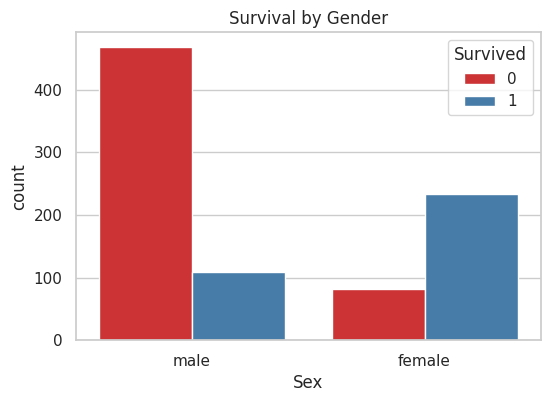

In [7]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=titanic, palette="Set1")
plt.title("Survival by Gender")
plt.show()

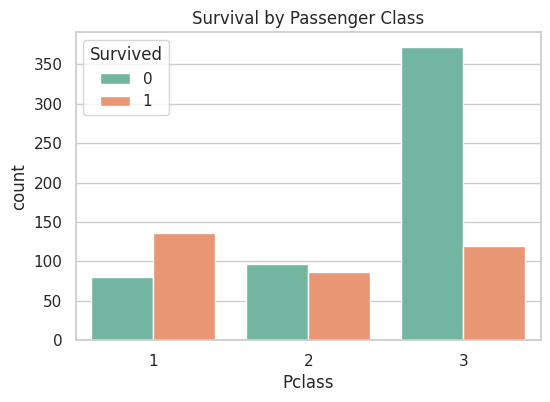

In [8]:
# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=titanic, palette="Set2")
plt.title("Survival by Passenger Class")
plt.show()

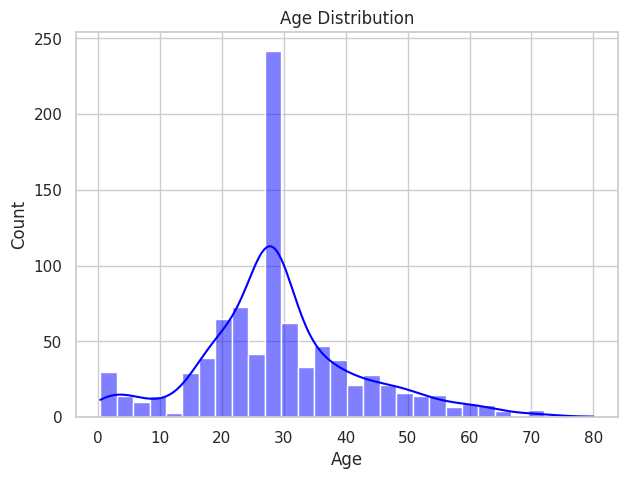

In [9]:
# Age Distribution
plt.figure(figsize=(7,5))
sns.histplot(titanic["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()


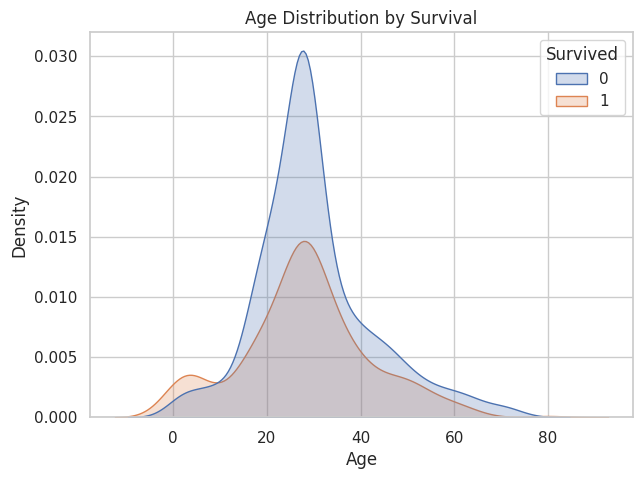

In [10]:
# Survival by Age
plt.figure(figsize=(7,5))
sns.kdeplot(x="Age", hue="Survived", data=titanic, fill=True)
plt.title("Age Distribution by Survival")
plt.show()

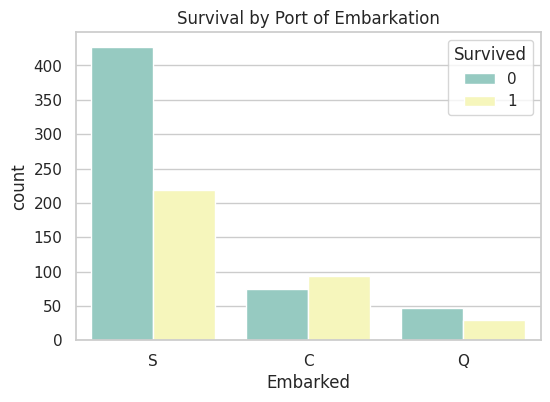

In [11]:
# Survival Rate by Embarked
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=titanic, palette="Set3")
plt.title("Survival by Port of Embarkation")
plt.show()

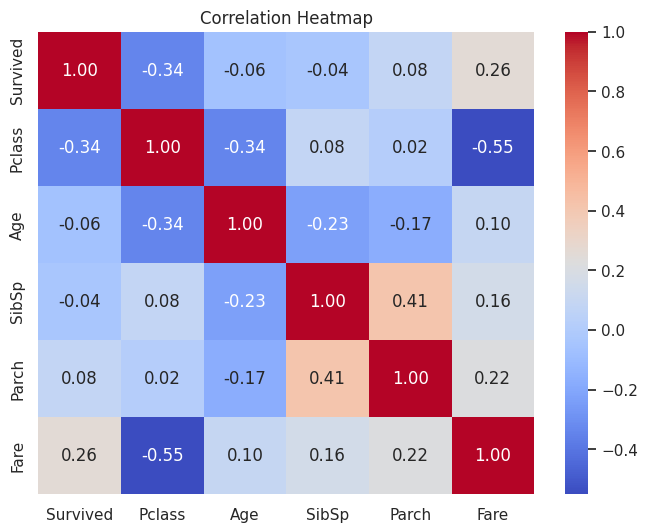

In [15]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(titanic.drop(columns=["Name", "Sex", "Embarked"]).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# -----------------------------
# 4. Key Insights
# -----------------------------
print("\n--- Insights ---")
print("1. Females had a much higher survival rate than males.")
print("2. Passengers in higher classes (1st class) had better chances of survival.")
print("3. Younger passengers had slightly better survival rates.")
print("4. Embarked from 'C' port had higher survival probability compared to others.")
print("5. Fare is positively correlated with survival (wealthier passengers survived more).")


--- Insights ---
1. Females had a much higher survival rate than males.
2. Passengers in higher classes (1st class) had better chances of survival.
3. Younger passengers had slightly better survival rates.
4. Embarked from 'C' port had higher survival probability compared to others.
5. Fare is positively correlated with survival (wealthier passengers survived more).
